# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [87]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

## Cargamos los datos de entrada del archivo csv

In [55]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [56]:
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [57]:
dataframe.clase.value_counts()
# Si una clase tiene mas datos, mas que el doble que el resto, nuestros datos estan sesgados. Podemos encontrar muchos mas patrones en esa clase. 
# Primero podríamos comprobar si realmente esta sesgado
# Data aumentation para solucionarlo - ya lo veremos. Es una técnica que se utiliza más con las imágenes. Girar la imagen, hacer zoom, no es exactamente los mismos datos que los originales por lo que aumentamos el número de ejemplos.

0    86
2    44
1    40
Name: clase, dtype: int64

In [58]:
# Feature Engineering = seleccionar características para mejorar nuestro análisis. Ejem: añadir columnas con la media, mediana, etc, pensar que columna nos da más valor para lo que queremos predecir, etc

In [59]:
# Queremos predecir la clase

## Visualizamos los datos

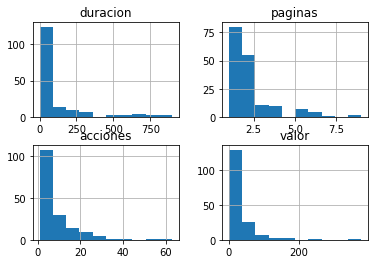

In [60]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

dataframe.drop(['clase'], 1).hist()
plt.show()

In [61]:
# todos las clases estan cerca del cero, son valores bajos.

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


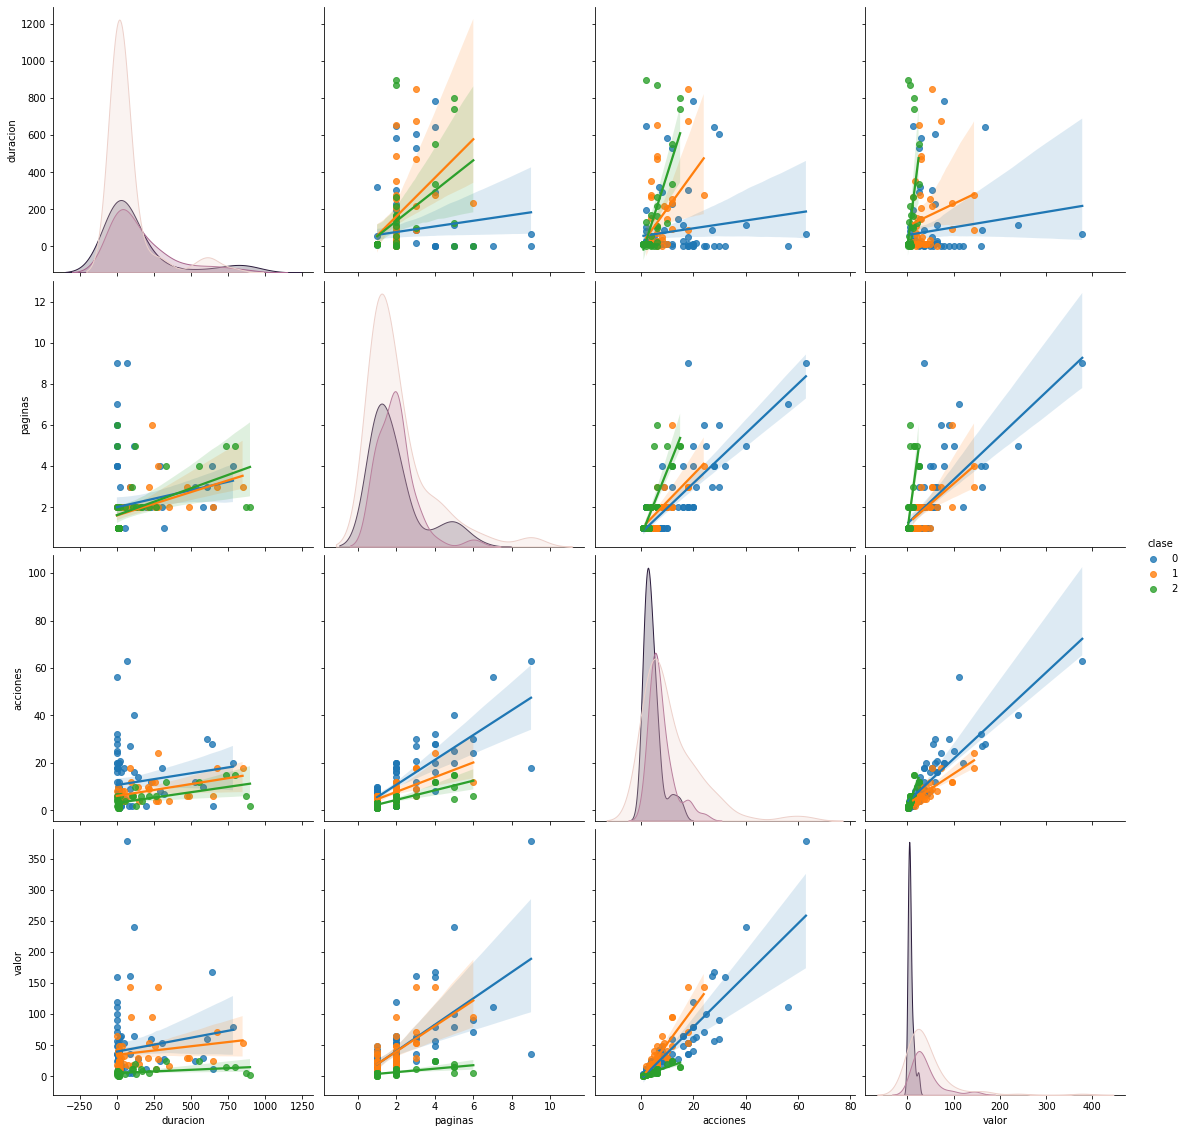

In [62]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

## Creamos el modelo

In [63]:
# Target es la columna clases. Entonces analizamos el dataframe sin esa columna

In [64]:
dataframe.drop(['clase'], 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [65]:
X = np.array(dataframe.drop(['clase'], axis=1)) # cogemos el dataframe y lo transformamos a array
y = np.array(dataframe['clase'])    # y = el valor a predecir
print(y.shape)
X.shape

(170,)


(170, 4)

In [66]:
# En este caso estamos entrenando el modelo con todos los datos. No estamos partiendo los datos en conjunto de train y test:

In [67]:
#model = linear_model.LogisticRegression(tol=0.75, C=9)
model = linear_model.LogisticRegression(max_iter=100)    
model.fit(X,y)

# Todos los algoritmos de sklearn estan intentando descender un gradiente, llegar a lo más bajo de todas las curvas. Cuanto mas arriba este mas alto es el error. El punto más bajo de la curva es donde hay más patrones.
# La notificación de esta celda se refiere a la convergencia. Para 100 iteraciones (# max_iter), no hemos encontrado el mínimo

# como no hemos encontrado el mínimo, tenemos que cambiar (incrementar) max_iter. Pero entrenando más no te aseguras que vayas a encontrar un mejor mínimo que antes

C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [68]:
# esta función tiene muchas variables diferentes: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

model = linear_model.LogisticRegression(max_iter=100, tol=0.75, C=9, solver="liblinear") # model ya está entrenada
# Problema 1: No se está entrenando con el conjunto de entrenamiento
model.fit(X,y)

model.score(X, y)  # acierto para el modelo con los parametros determinados

0.5470588235294118

In [69]:
# si le quito el solver, por defecto el solver='lbggs'. De momento saber las diferencias es dificil, entonces para saber cual es la mejor opción simplemente vamos probando con todas las opciones. 

# verbose es un entero. Si aumentamos su valor, nos da más informacion sobre lo que va ocurriendo a lo largo del entrenamiento.

model = linear_model.LogisticRegression(max_iter=100, verbose=999) 
model.fit(X,y)

model.score(X, y)  # acierto para el modelo con los parametros determinados

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Usuario\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7823529411764706

In [70]:
# con pickle podemos guardar nuestro modelo con la información que hemos hecho para no perder los buenos resultados. Porque al entrenar un modelo, él coje los parametros aleatoreamente, cuando apagamos el ordenador y volvemos a empezar el score va a ser diferente, puede que peor, y no podríamos hacer nada para mejorarlo.

In [71]:
# estamos haciendo predicciones sobre las variables menos el target
# el target son categorías (0,1,2) por eso las predicciones también están en ese formato
predictions = model.predict(X)  # predictions = y_predict
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
# este score llama a una función que llama a y_predict. Lo vemos más abajo
model.score(X,y)

0.7823529411764706

In [73]:
# Ahora ya tengo el modelo entrenado y quiero hacer una predicción nueva:

In [79]:
X_new = pd.DataFrame({'duracion': [7.0], 'paginas': [1], 'acciones': [4], 'valor': [8]})    # mis valores nuevos
X_new

,duracion,paginas,acciones,valor
0,7.0,1,4,8


In [80]:
X_new.shape

(1, 4)

In [81]:
# predicción del dato nuevo
model.predict(X_new)

array([0], dtype=int64)

In [ ]:
# para ver si el modelo no ha fallado, podemos comprobarlo con un valor existente

In [78]:
X_exist = pd.DataFrame({'duracion': [7.0], 'paginas': [2], 'acciones': [4], 'valor': [8]})    # mis valores existentes
model.predict(X_exist)
# en la tabla original el valor era dos por lo que el modelo es correcto
# aunque para algo existente podría fallar ya que el score no es del 100%

array([2], dtype=int64)

## Adicional: Validación del Modelo

In [82]:
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape)
X_test.shape

(136, 4)


(34, 4)

#### New update:

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Convergence

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [ ]:
# seed es para el conjunto de validación pero el modelo puede haberse generado con datos diferentes organizacion por lo que el +- puede varias? pero la media va a ser la misma - esto lo vuelvo a decir abajo con lo de pickle, no necesario para nosotros ahora.

In [ ]:
# cross validation = comprobar los resultados del conjunto de validación y para saber si hay sobre-entrenamiento. En este caso el conjunto de validacion daría mal resultado y el conjunto de entrenamiento daría buen resultado.
# Para resolver esto podemos: 1- cambiar la semilla, 2- quitar columnas que a lo mejor no son válidas, 3- podemos añadir mas datos/columnas, etc
# se hace despues de train y test. 

In [ ]:
# Kfold: n_splits: cuantos conjuntos de validación va a haber. El tamaño de cada uno de los conjuntos sería X/n_splits

In [83]:
# mala praxis que le pasemos todos los datos al cross validation porque luego no podemos testearlo
# esta función te ayuda para ver cuales son los mejores datos para entrenar el modelo

In [ ]:
# este scoring es para los conjuntos de validación

In [44]:
# esto no entrena el modelo
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
# esta seed es para siempre coger los mismos conjuntos de validación. No garantiza el mismo scoring al 100% para ello habría que guardar el modelo en pickle porque ha cogido los datos de manera diferente, pero lo que puede variar es en un 1% por lo que de momento no es relevante.
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("----------")
print("----------")

[0.78571429 0.64285714 0.71428571 0.71428571 0.71428571 0.71428571
 0.84615385 0.92307692 0.61538462 0.61538462]
----------
Logistic Regression: 0.728571 +- (0.094186)
----------
----------
Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_war

In [ ]:
# 1. dividimos datos train/test
# 3. cross validation para el conjunto de entrenamiento (del modelo sin entrenar)
# 4. entrenamos los datos para el conjunto de entrenamiento si cross validation es acceptable. Si no, sabríamos que los datos elegidos son malos
# 5. el score del conjunto de train y test debería ser mas o menos lo mismo

In [45]:
model.score(X_test, Y_test)

0.8529411764705882

In [46]:
X_test[0]

array([12.,  1.,  6., 48.])

In [47]:
Y_test[0]

1

In [48]:
# predecir la primera fila de la variable X_test. Yo no le estoy dando estos datos. Podemos verificar si es lo que teníamos
model.predict(X_test[0:1])[0]

1

In [49]:
# fiabilidad de que tengo de que el resultado sea la clase primera
# calculamos la probabilidad de que sea de una clase o que sea de otra
# como tenemos tres clases, tenemos tres resultados. El primero se refiere a la primera clase
model.predict_proba(X_test[0:1])[0]

array([4.63458982e-01, 5.36541018e-01, 1.12881216e-27])

In [86]:
# si el porcentaje no es muy alto, significa que no esta seguro de que sea de una clase u otra, por lo que mi modelo no es muy fiable. 
model.predict_proba(X_test[0:1])[0][0]
# en este caso el modelo cree que un dato pertenece a la clase 0 un 46%, no un porcentaje alto.

0.46351577299181485

In [50]:
max(model.predict_proba(X_test[0:1])[0])

0.5365410175660533

In [51]:
sum(model.predict_proba(X_test[0:1])[0])

1.0

In [52]:
predictions = model.predict(X_test)
print(model.score(X=X_test, y=Y_test))
print(accuracy_score(Y_test, predictions))  # probabilidad que tiene parra el conjunto del test

0.8529411764705882
0.8529411764705882


In [54]:
# Otra forma de calcular
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Reporte de Resultados

In [55]:
Y_test.shape

(34,)

Diagonal principal = True positive

![](Confusion_matrix_multilabel.png)

In [56]:
print(confusion_matrix(Y_test, predictions))
# de izquierda a derecha de arriba a abajo:

# 16 numeros que ha tenido que acertar y ha acertado (true positive)
# 2 ceros que se han dicho que son dos
# 3 unos que se han dicho que son ceros
# 3 unos que se han dicho que son unos
# 10 dos que se han dicho que son dos

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


# Clasificación de nuevos registros

In [57]:
X_new = pd.DataFrame({'duracion': [10, 4], 'paginas': [3,10], 'acciones': [5,1], 'valor': [9,987]})
X_new

,duracion,paginas,acciones,valor
0,10,3,5,9
1,4,10,1,987


In [58]:
X_new.shape

(2, 4)

In [59]:
model.predict(X_new)

array([2, 1], dtype=int64)